Presented by: Shreyansh Bhalodiya ​

Pui Man SIU​

Megha Bhagat

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as stats

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn import preprocessing


np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
pd.options.display.float_format = '{:,.3f}'.format
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv
import sys
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.preprocessing import StandardScaler
from pandas import datetime
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
import math
from keras.utils import np_utils

<ipython-input-171-3732412e2418>:27: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:

from google.colab import drive

In [ ]:
df = pd.read_csv("melb_data.csv")

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,"1,480,000.000",S,Biggin,3/12/2016,2.500,"3,067.000",2.000,1.000,1.000,202.000,NaN,NaN,Yarra,-37.800,144.998,Northern Metropolitan,"4,019.000"
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000.000",S,Biggin,4/02/2016,2.500,"3,067.000",2.000,1.000,0.000,156.000,79.000,"1,900.000",Yarra,-37.808,144.993,Northern Metropolitan,"4,019.000"
2,Abbotsford,5 Charles St,3,h,"1,465,000.000",SP,Biggin,4/03/2017,2.500,"3,067.000",3.000,2.000,0.000,134.000,150.000,"1,900.000",Yarra,-37.809,144.994,Northern Metropolitan,"4,019.000"
3,Abbotsford,40 Federation La,3,h,"850,000.000",PI,Biggin,4/03/2017,2.500,"3,067.000",3.000,2.000,1.000,94.000,NaN,NaN,Yarra,-37.797,144.997,Northern Metropolitan,"4,019.000"
4,Abbotsford,55a Park St,4,h,"1,600,000.000",VB,Nelson,4/06/2016,2.500,"3,067.000",3.000,1.000,2.000,120.000,142.000,"2,014.000",Yarra,-37.807,144.994,Northern Metropolitan,"4,019.000"


### Data Dictionary

In [ ]:
## https://www.kaggle.com/dfs/anthonypino/melbourne-housing-market
# Suburb: Suburb

# Address: Address

# Rooms: Number of rooms

# Price: Price in Australian dollars

# Method:
# S - property sold;
# SP - property sold prior;
# PI - property passed in;
# PN - sold prior not disclosed;
# SN - sold not disclosed;
# NB - no bid;
# VB - vendor bid;
# W - withdrawn prior to auction;
# SA - sold after auction;
# SS - sold after auction price not disclosed.
# N/A - price or highest bid not available.

# Type:
# br - bedroom(s);
# h - house,cottage,villa, semi,terrace;
# u - unit, duplex;
# t - townhouse;
# dev site - development site;
# o res - other residential.

# SellerG: Real Estate Agent

# Date: Date sold

# Distance: Distance from CBD in Kilometres

# Regionname: General Region (West, North West, North, North east …etc)

# Propertycount: Number of properties that exist in the suburb.

# Bedroom2 : Scraped # of Bedrooms (from different source)

# Bathroom: Number of Bathrooms

# Car: Number of carspots

# Landsize: Land Size in Metres

# BuildingArea: Building Size in Metres

# YearBuilt: Year the house was built

# CouncilArea: Governing council for the area

# Lattitude: Self explanitory

# Longtitude: Self explanitory

In [ ]:
df.shape

(13580, 21)

In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'], dtype='object')

In [ ]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
(df.isnull().sum()*100)/len(df)

Suburb           0.000
Address          0.000
Rooms            0.000
Type             0.000
Price            0.000
Method           0.000
SellerG          0.000
Date             0.000
Distance         0.000
Postcode         0.000
Bedroom2         0.000
Bathroom         0.000
Car              0.457
Landsize         0.000
BuildingArea    47.496
YearBuilt       39.580
CouncilArea     10.081
Lattitude        0.000
Longtitude       0.000
Regionname       0.000
Propertycount    0.000
dtype: float64

In [ ]:
nf = df[df["BuildingArea"] > df["Landsize"]]
nf.shape

## Here we have few columns where Building Area is greater then land size which is not possible so we will replace 
## those numbers with null first becasue those values are not correct. 

(1323, 21)

In [ ]:
df["CouncilArea"].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [ ]:
### Here we can see that we have 3 columns which has maximum null values and it will be really difficult to 
### drop all of them as they are important columns. 


## let's first replace null values in built areas. 

df["Built_area_percent"] = df["BuildingArea"]/df["Landsize"]

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Built_area_percent
0,Abbotsford,85 Turner St,2,h,"1,480,000.000",S,Biggin,3/12/2016,2.500,"3,067.000",2.000,1.000,1.000,202.000,NaN,NaN,Yarra,-37.800,144.998,Northern Metropolitan,"4,019.000",NaN
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000.000",S,Biggin,4/02/2016,2.500,"3,067.000",2.000,1.000,0.000,156.000,79.000,"1,900.000",Yarra,-37.808,144.993,Northern Metropolitan,"4,019.000",0.506
2,Abbotsford,5 Charles St,3,h,"1,465,000.000",SP,Biggin,4/03/2017,2.500,"3,067.000",3.000,2.000,0.000,134.000,150.000,"1,900.000",Yarra,-37.809,144.994,Northern Metropolitan,"4,019.000",1.119
3,Abbotsford,40 Federation La,3,h,"850,000.000",PI,Biggin,4/03/2017,2.500,"3,067.000",3.000,2.000,1.000,94.000,NaN,NaN,Yarra,-37.797,144.997,Northern Metropolitan,"4,019.000",NaN
4,Abbotsford,55a Park St,4,h,"1,600,000.000",VB,Nelson,4/06/2016,2.500,"3,067.000",3.000,1.000,2.000,120.000,142.000,"2,014.000",Yarra,-37.807,144.994,Northern Metropolitan,"4,019.000",1.183


In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Built_area_percent
0,Abbotsford,85 Turner St,2,h,"1,480,000.000",S,Biggin,3/12/2016,2.500,"3,067.000",2.000,1.000,1.000,202.000,NaN,NaN,Yarra,-37.800,144.998,Northern Metropolitan,"4,019.000",NaN
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000.000",S,Biggin,4/02/2016,2.500,"3,067.000",2.000,1.000,0.000,156.000,79.000,"1,900.000",Yarra,-37.808,144.993,Northern Metropolitan,"4,019.000",0.506
2,Abbotsford,5 Charles St,3,h,"1,465,000.000",SP,Biggin,4/03/2017,2.500,"3,067.000",3.000,2.000,0.000,134.000,150.000,"1,900.000",Yarra,-37.809,144.994,Northern Metropolitan,"4,019.000",1.119
3,Abbotsford,40 Federation La,3,h,"850,000.000",PI,Biggin,4/03/2017,2.500,"3,067.000",3.000,2.000,1.000,94.000,NaN,NaN,Yarra,-37.797,144.997,Northern Metropolitan,"4,019.000",NaN
4,Abbotsford,55a Park St,4,h,"1,600,000.000",VB,Nelson,4/06/2016,2.500,"3,067.000",3.000,1.000,2.000,120.000,142.000,"2,014.000",Yarra,-37.807,144.994,Northern Metropolitan,"4,019.000",1.183


In [ ]:
df.loc[(df.Built_area_percent > 1), "Built_area_percent"] = 1

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Built_area_percent
0,Abbotsford,85 Turner St,2,h,"1,480,000.000",S,Biggin,3/12/2016,2.500,"3,067.000",2.000,1.000,1.000,202.000,NaN,NaN,Yarra,-37.800,144.998,Northern Metropolitan,"4,019.000",NaN
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000.000",S,Biggin,4/02/2016,2.500,"3,067.000",2.000,1.000,0.000,156.000,79.000,"1,900.000",Yarra,-37.808,144.993,Northern Metropolitan,"4,019.000",0.506
2,Abbotsford,5 Charles St,3,h,"1,465,000.000",SP,Biggin,4/03/2017,2.500,"3,067.000",3.000,2.000,0.000,134.000,150.000,"1,900.000",Yarra,-37.809,144.994,Northern Metropolitan,"4,019.000",1.000
3,Abbotsford,40 Federation La,3,h,"850,000.000",PI,Biggin,4/03/2017,2.500,"3,067.000",3.000,2.000,1.000,94.000,NaN,NaN,Yarra,-37.797,144.997,Northern Metropolitan,"4,019.000",NaN
4,Abbotsford,55a Park St,4,h,"1,600,000.000",VB,Nelson,4/06/2016,2.500,"3,067.000",3.000,1.000,2.000,120.000,142.000,"2,014.000",Yarra,-37.807,144.994,Northern Metropolitan,"4,019.000",1.000


In [ ]:
df["Built_area_percent"].mean()

0.49261336938459177

In [ ]:
# replacing na values in college with No college
df["Built_area_percent"].fillna(df["Built_area_percent"].mean(), inplace = True)

In [ ]:
df.head()
## Now let's replace BuildingArea column with Built_area_percent *Landsize
## so what we have done is we have replace null value with average mean of Built_area_percent also for incorrect values 
## we have replaced it with same built area as landsize. 

df["BuildingArea_final"] = df["Landsize"]*df["Built_area_percent"]

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Built_area_percent,BuildingArea_final
0,Abbotsford,85 Turner St,2,h,"1,480,000.000",S,Biggin,3/12/2016,2.500,"3,067.000",2.000,1.000,1.000,202.000,NaN,NaN,Yarra,-37.800,144.998,Northern Metropolitan,"4,019.000",0.493,99.508
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000.000",S,Biggin,4/02/2016,2.500,"3,067.000",2.000,1.000,0.000,156.000,79.000,"1,900.000",Yarra,-37.808,144.993,Northern Metropolitan,"4,019.000",0.506,79.000
2,Abbotsford,5 Charles St,3,h,"1,465,000.000",SP,Biggin,4/03/2017,2.500,"3,067.000",3.000,2.000,0.000,134.000,150.000,"1,900.000",Yarra,-37.809,144.994,Northern Metropolitan,"4,019.000",1.000,134.000
3,Abbotsford,40 Federation La,3,h,"850,000.000",PI,Biggin,4/03/2017,2.500,"3,067.000",3.000,2.000,1.000,94.000,NaN,NaN,Yarra,-37.797,144.997,Northern Metropolitan,"4,019.000",0.493,46.306
4,Abbotsford,55a Park St,4,h,"1,600,000.000",VB,Nelson,4/06/2016,2.500,"3,067.000",3.000,1.000,2.000,120.000,142.000,"2,014.000",Yarra,-37.807,144.994,Northern Metropolitan,"4,019.000",1.000,120.000


In [ ]:
## For council area we have 1323 null values out of 13580 so let's simply replace those with '0' for now and for car we will simply add 0 inplace of null because there are only 62 values.  
df["CouncilArea"].fillna('0', inplace = True)
df["Car"].fillna(0, inplace = True)

In [ ]:

from sklearn.impute import KNNImputer


In [ ]:
imputer = KNNImputer(n_neighbors=3)
df_new = df[["YearBuilt","Lattitude","Longtitude"]]

In [ ]:
df_filled = pd.DataFrame(imputer.fit_transform(df_new),columns=["YearBuilt","Lattitude","Longtitude"])

In [ ]:
df_filled.tail(10)

,YearBuilt,Lattitude,Longtitude
13570,"1,988.333",-37.884,145.228
13571,"1,980.000",-37.869,145.221
13572,"2,006.000",-37.707,145.079
13573,"1,980.000",-37.893,144.648
13574,"1,978.333",-37.679,144.894
13575,"1,981.000",-37.906,145.168
13576,"1,995.000",-37.859,144.879
13577,"1,997.000",-37.853,144.887
13578,"1,920.000",-37.859,144.893
13579,"1,920.000",-37.812,144.884


In [ ]:
df_filled['YearBuilt'] = df_filled['YearBuilt'].astype(int)



# https://datatofish.com/floats-to-integers-dataframe/

In [ ]:
df_filled["YearBuilt"].tail(10)

13570    1988
13571    1980
13572    2006
13573    1980
13574    1978
13575    1981
13576    1995
13577    1997
13578    1920
13579    1920
Name: YearBuilt, dtype: int64

In [ ]:
print(df_filled.shape)
print(df.shape)

## we have both the dataframe with same row size and same sequence now let's replace YearBuilt in main dataframe from df_filled

(13580, 3)
(13580, 23)


In [ ]:
df["YearBuilt"] = df_filled["YearBuilt"]
df.drop(['BuildingArea'], axis=1, inplace = True)

In [ ]:
### Now let's check the null values in main dataframe again. 
### we can see that our data is clean from null values. 

df.isnull().sum()

Suburb                0
Address               0
Rooms                 0
Type                  0
Price                 0
Method                0
SellerG               0
Date                  0
Distance              0
Postcode              0
Bedroom2              0
Bathroom              0
Car                   0
Landsize              0
YearBuilt             0
CouncilArea           0
Lattitude             0
Longtitude            0
Regionname            0
Propertycount         0
Built_area_percent    0
BuildingArea_final    0
dtype: int64

## Outlier Analysis.

Text(0, 0.5, 'Price in millions AUD')

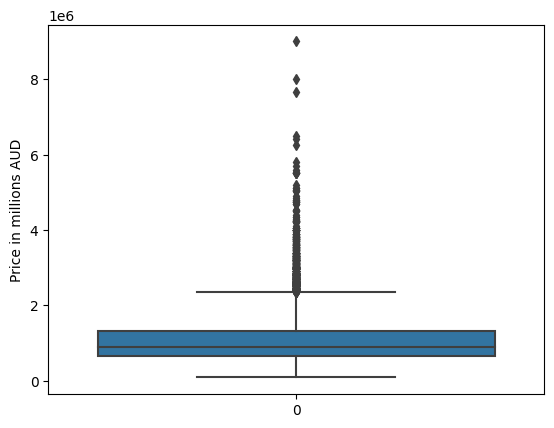

In [ ]:
import seaborn as sns
sns.boxplot(df['Price'])
plt.ylabel('Price in millions AUD')


<Axes: >

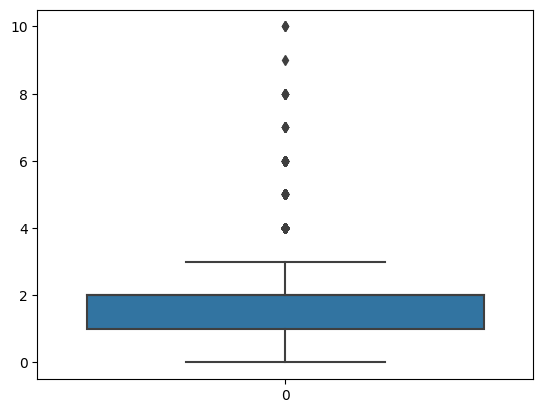

In [ ]:
sns.boxplot(df['Car'])

Text(0, 0.5, 'Year')

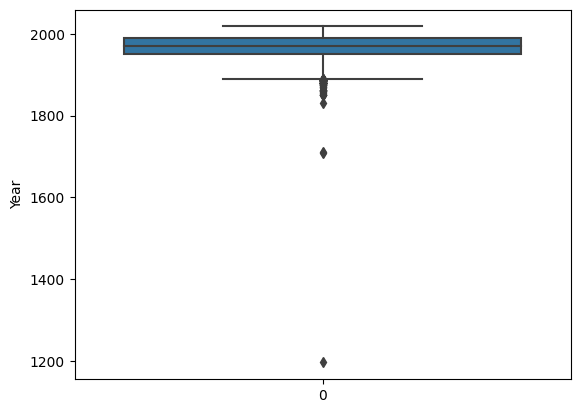

In [ ]:
sns.boxplot(df['YearBuilt'])
plt.ylabel('Year')

Text(0, 0.5, 'Metres')

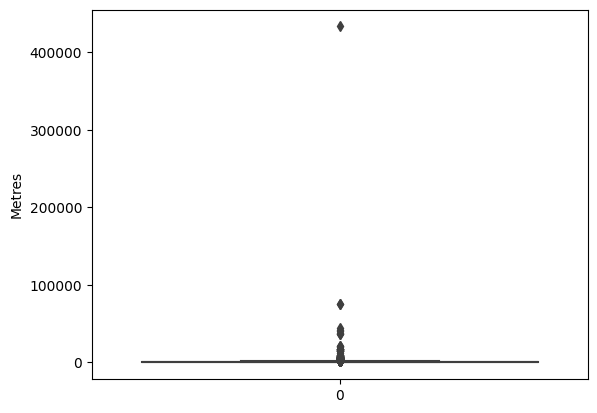

In [ ]:
sns.boxplot(df['Landsize'])
plt.ylabel('Metres')

In [ ]:
### we saw that we have many variables with outlier let's drop outlier
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
df.dtypes

Suburb                 object
Address                object
Rooms                   int64
Type                   object
Price                 float64
Method                 object
SellerG                object
Date                   object
Distance              float64
Postcode              float64
Bedroom2              float64
Bathroom              float64
Car                   float64
Landsize              float64
YearBuilt               int64
CouncilArea            object
Lattitude             float64
Longtitude            float64
Regionname             object
Propertycount         float64
Built_area_percent    float64
BuildingArea_final    float64
dtype: object

In [ ]:
## let's drop outlier form all float and int columns which we can affect out model. 
df = remove_outlier(df_in = df, col_name = 'Price')
df = remove_outlier(df_in = df, col_name = 'Landsize')
df = remove_outlier(df_in = df, col_name = 'YearBuilt')
df = remove_outlier(df_in = df, col_name = 'BuildingArea_final')


Text(0, 0.5, 'Price in millions AUD')

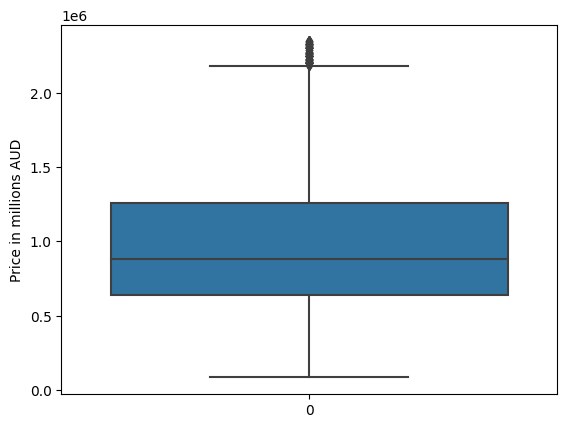

In [ ]:
import seaborn as sns
sns.boxplot(df['Price'])
#plt.title('Price distribution for housing in Melbourne')
plt.ylabel('Price in millions AUD')

In [ ]:
df['Price'].describe()

count      12,143.000
mean      976,462.865
std       447,402.975
min        85,000.000
25%       640,000.000
50%       879,000.000
75%     1,256,000.000
max     2,345,000.000
Name: Price, dtype: float64

Text(0, 0.5, 'Metres')

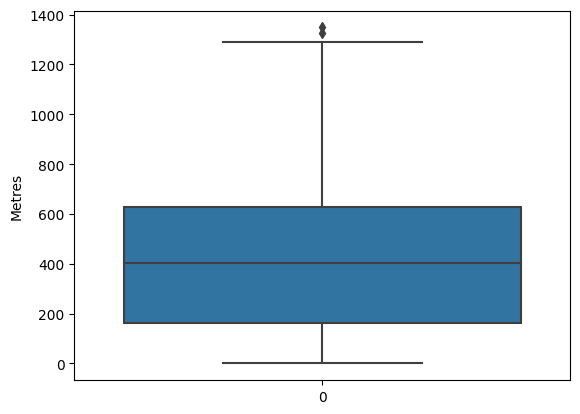

In [ ]:
sns.boxplot(df['Landsize'])
plt.ylabel('Metres')

Text(0, 0.5, 'Year')

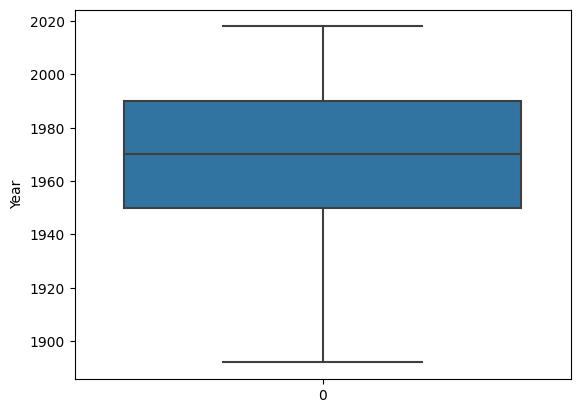

In [ ]:
sns.boxplot(df['YearBuilt'])
plt.ylabel('Year')

In [ ]:
### Hence we have dropped all our outliers from all the main varialbes which we thought can affect our model now let's check the final shape which we can use for modelling.
df.shape
### finally we have 12022 rows and 22 columns for modelling which is good data. 

(12143, 22)

In [ ]:
### sorting columns which can be useful for modelling. 
df.columns

## we are dropping Date, address, BuildingArea_final because address will be unique for each house hence no learning and for building area we already have taken the percent column. 

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'Built_area_percent', 'BuildingArea_final'], dtype='object')

In [ ]:
df['Propertycount'].value_counts()
df['Propertycount'].nunique()

304

##**Business questions to be answered by EDA**

Q1 What is the age distribution of proeperties in Melbourne?

In [ ]:
#Cleanse records with age < 0 by the time house is sold
df['YearSold'] =df['Date'].str[-4:].astype(int)
df['sold_age'] = df['YearSold'] - df['YearBuilt']
df = df[df['sold_age']>= 0]
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Built_area_percent,BuildingArea_final,YearSold,sold_age
0,Abbotsford,85 Turner St,2,h,"1,480,000.000",S,Biggin,3/12/2016,2.500,"3,067.000",2.000,1.000,1.000,202.000,1951,Yarra,-37.800,144.998,Northern Metropolitan,"4,019.000",0.493,99.508,2016,65
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000.000",S,Biggin,4/02/2016,2.500,"3,067.000",2.000,1.000,0.000,156.000,1900,Yarra,-37.808,144.993,Northern Metropolitan,"4,019.000",0.506,79.000,2016,116
2,Abbotsford,5 Charles St,3,h,"1,465,000.000",SP,Biggin,4/03/2017,2.500,"3,067.000",3.000,2.000,0.000,134.000,1900,Yarra,-37.809,144.994,Northern Metropolitan,"4,019.000",1.000,134.000,2017,117
3,Abbotsford,40 Federation La,3,h,"850,000.000",PI,Biggin,4/03/2017,2.500,"3,067.000",3.000,2.000,1.000,94.000,1967,Yarra,-37.797,144.997,Northern Metropolitan,"4,019.000",0.493,46.306,2017,50
4,Abbotsford,55a Park St,4,h,"1,600,000.000",VB,Nelson,4/06/2016,2.500,"3,067.000",3.000,1.000,2.000,120.000,2014,Yarra,-37.807,144.994,Northern Metropolitan,"4,019.000",1.000,120.000,2016,2


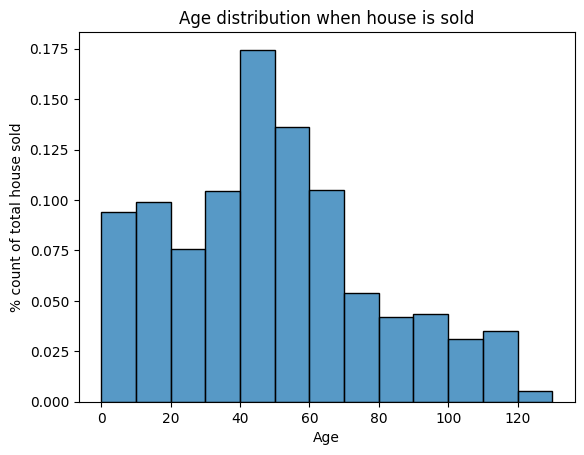

In [ ]:
# Age distribution plot
sns.histplot(x='sold_age', data=df, binwidth = 10, stat = 'probability')
plt.title('Age distribution when house is sold')
plt.xlabel('Age')
plt.ylabel('% count of total house sold')
plt.show()

Q2. Which area has the highest growth rate in property price?

In [ ]:
df['Regionname'].value_counts()

Southern Metropolitan         3860
Northern Metropolitan         3549
Western Metropolitan          2820
Eastern Metropolitan          1367
South-Eastern Metropolitan     432
Eastern Victoria                44
Northern Victoria               34
Western Victoria                31
Name: Regionname, dtype: int64

In [ ]:
# we only select Metropolitan regions since there is more sample, data stored in df_region
df_region = df[df['Regionname'].str.contains('Metropolitan')]

#Reference: https://www.shecancode.io/blog/filter-a-pandas-dataframe-by-a-partial-string-or-pattern-in-8-ways

In [ ]:
df_region_price = df_region.groupby(['Regionname','YearSold']).agg(avg_price =('Price',np.mean))
df_region_price['pct_change'] =df_region_price.groupby('Regionname')['avg_price'].pct_change()
df_region_price

#Reference: https://kanoki.org/2019/09/29/how-to-find-percentage-change-in-pandas/

avg_price  pct_change
Regionname                 YearSold                          
Eastern Metropolitan       2016       991,911.123         NaN
                           2017     1,086,500.539       0.095
Northern Metropolitan      2016       852,106.179         NaN
                           2017       874,376.097       0.026
South-Eastern Metropolitan 2016       894,951.958         NaN
                           2017       889,611.167      -0.006
Southern Metropolitan      2016     1,122,954.495         NaN
                           2017     1,221,506.639       0.088
Western Metropolitan       2016       841,123.800         NaN
                           2017       856,791.082       0.019

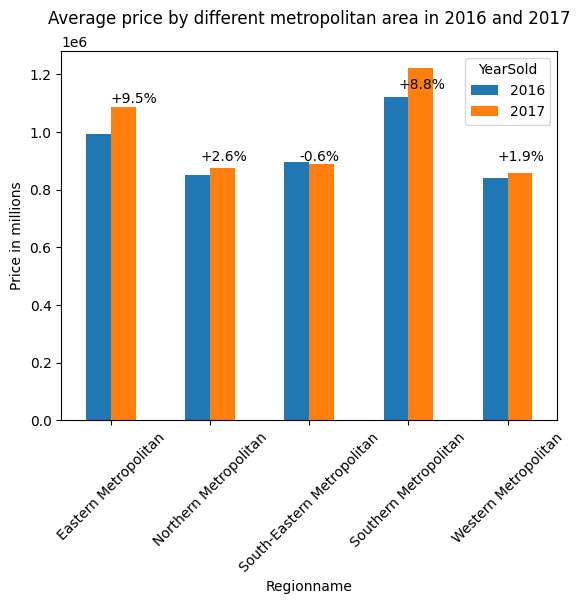

In [ ]:
#Plot the average prie by region
pd.pivot_table(df_region, index ='Regionname', columns = 'YearSold', values = 'Price', aggfunc = 'mean').plot.bar()
plt.title('Average price by different metropolitan area in 2016 and 2017', y =1.05)
plt.ylabel('Price in millions')
plt.xticks(rotation = 45) 
plt.text(0.0,1.1e6, '+9.5%')
plt.text(0.9,0.9e6, '+2.6%')
plt.text(1.9,0.9e6, '-0.6%')
plt.text(2.9,1.15e6, '+8.8%')
plt.text(3.9,0.9e6, '+1.9%')
plt.show()

Q4. Is there a significant difference in house price between different regions of Melbourne in 2017?

<ipython-input-221-14290e6f22d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region2017['Regionname']= df_region2017['Regionname'].str.replace(' Metropolitan', '')


Text(0, 0.5, 'Price in millions')

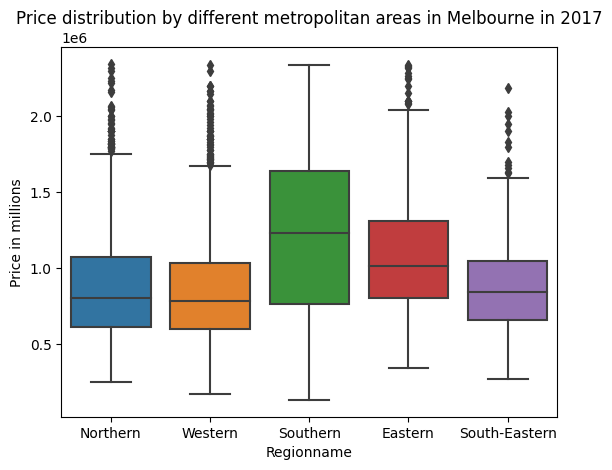

In [ ]:
#Visualize the price distribution by regions
df_region2017 = df_region[df_region['YearSold']==2017]
df_region2017['Regionname']= df_region2017['Regionname'].str.replace(' Metropolitan', '')
sns.boxplot(x='Regionname',y = 'Price',data =df_region2017)
plt.title('Price distribution by different metropolitan areas in Melbourne in 2017')
plt.ylabel('Price in millions')

In [ ]:
# 4a. test if the mean price between Eastern and Southern Metropolitan area are significantly different from each 
# other at a=0.05
#H0: u1 - u2 = 0
#H1: u1 - u2 ≠ 0
east = df_region[(df_region['YearSold']==2017) & (df_region['Regionname'] == 'Eastern Metropolitan')]['Price']
south = df_region[(df_region['YearSold']==2017) & (df_region['Regionname'] == 'Southern Metropolitan')]['Price']

In [ ]:
tstat, pval =stats.ttest_ind(east, south, equal_var = False)
print(tstat, pval)

#Conclusion: reject H0. Avg price differs btw Eastern and Southern

-7.610002829901717 3.88949027217051e-14


In [ ]:
# 4b. test if the mean price between Western and Northern Metropolitan area are significantly different from each 
# other at a=0.05
#H0: u1 - u2 = 0
#H1: u1 - u2 ≠ 0
west = df_region[(df_region['YearSold']==2017) & (df_region['Regionname'] == 'Western Metropolitan')]['Price']
north = df_region[(df_region['YearSold']==2017) & (df_region['Regionname'] == 'Northern Metropolitan')]['Price']

In [ ]:
tstat, pval =stats.ttest_ind(west, north, equal_var = False)
print(tstat, pval)

#Conclusion: DO NOT reject H0. No difference in house price btw Western and Northern at a = 0.05

-1.3783453593424284 0.16819424903822283


In [ ]:
## let's rename price with TARGET

df.rename(columns = {'Price':'TARGET'}, inplace = True)

In [ ]:
df_model = df[['Suburb','Rooms', 'Type','Method', 'SellerG',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Built_area_percent','TARGET']]

In [ ]:
df_model.head()

,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Built_area_percent,TARGET
0,Abbotsford,2,h,S,Biggin,2.500,"3,067.000",2.000,1.000,1.000,202.000,1951,Yarra,-37.800,144.998,Northern Metropolitan,"4,019.000",0.493,"1,480,000.000"
1,Abbotsford,2,h,S,Biggin,2.500,"3,067.000",2.000,1.000,0.000,156.000,1900,Yarra,-37.808,144.993,Northern Metropolitan,"4,019.000",0.506,"1,035,000.000"
2,Abbotsford,3,h,SP,Biggin,2.500,"3,067.000",3.000,2.000,0.000,134.000,1900,Yarra,-37.809,144.994,Northern Metropolitan,"4,019.000",1.000,"1,465,000.000"
3,Abbotsford,3,h,PI,Biggin,2.500,"3,067.000",3.000,2.000,1.000,94.000,1967,Yarra,-37.797,144.997,Northern Metropolitan,"4,019.000",0.493,"850,000.000"
4,Abbotsford,4,h,VB,Nelson,2.500,"3,067.000",3.000,1.000,2.000,120.000,2014,Yarra,-37.807,144.994,Northern Metropolitan,"4,019.000",1.000,"1,600,000.000"


In [ ]:
df_model.dtypes

Suburb                 object
Rooms                   int64
Type                   object
Method                 object
SellerG                object
Distance              float64
Postcode              float64
Bedroom2              float64
Bathroom              float64
Car                   float64
Landsize              float64
YearBuilt               int64
CouncilArea            object
Lattitude             float64
Longtitude            float64
Regionname             object
Propertycount         float64
Built_area_percent    float64
TARGET                float64
dtype: object

In [ ]:
convert_dict = {"YearBuilt":str
               }
  
df_model = df_model.astype(convert_dict)
print(df_model.dtypes)

Suburb                 object
Rooms                   int64
Type                   object
Method                 object
SellerG                object
Distance              float64
Postcode              float64
Bedroom2              float64
Bathroom              float64
Car                   float64
Landsize              float64
YearBuilt              object
CouncilArea            object
Lattitude             float64
Longtitude            float64
Regionname             object
Propertycount         float64
Built_area_percent    float64
TARGET                float64
dtype: object


In [ ]:
df_model_dummies = pd.get_dummies(df_model)
df_model_dummies.shape

(12137, 753)

In [ ]:
# No of levels in each categorical variable
df_model_cat = df_model.select_dtypes(exclude=['int', 'float'])
for col in df_model_cat.columns:
    print(col,df_model_cat[col].nunique()) # to print categories name only
    

Suburb 307
Type 3
Method 5
SellerG 261
YearBuilt 123
CouncilArea 34
Regionname 8


In [ ]:
df_model_dummies.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Built_area_percent,TARGET,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulleen,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Coburg,Suburb_Coburg North,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Lower Plenty,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Mont Albert,Suburb_Montmorency,Suburb_Montrose,Suburb_Moonee Ponds,Suburb_Moorabbin,Suburb_Mooroolbark,Suburb_Mordialloc,Suburb_Mount Evelyn,Suburb_Mount Waverley,Suburb_Mulgrave,Suburb_Murrumbeena,Suburb_Narre Warren,Suburb_Newport,Suburb_Niddrie,Suburb_Noble Park,Suburb_North Melbourne,Suburb_Northcote,

In [ ]:
## we have dummies column around 754. Now before doing feature analysis and see how our model is fitting without any feature selection.

In [ ]:
train, test = train_test_split(df_model_dummies, test_size=0.30)

## train test split 70:30 

In [ ]:
df_model_dummies.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount',
       ...
       'CouncilArea_Yarra', 'CouncilArea_Yarra Ranges', 'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan', 'Regionname_Western Victoria'], dtype='object', length=753)

In [ ]:
df_model_dummies.loc[:, df_model_dummies.columns != 'TARGET']

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Built_area_percent,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulleen,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Coburg,Suburb_Coburg North,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Lower Plenty,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Mont Albert,Suburb_Montmorency,Suburb_Montrose,Suburb_Moonee Ponds,Suburb_Moorabbin,Suburb_Mooroolbark,Suburb_Mordialloc,Suburb_Mount Evelyn,Suburb_Mount Waverley,Suburb_Mulgrave,Suburb_Murrumbeena,Suburb_Narre Warren,Suburb_Newport,Suburb_Niddrie,Suburb_Noble Park,Suburb_North Melbourne,Suburb_Northcote,Suburb_

In [ ]:
X_train = train.loc[:, train.columns != 'TARGET']
y_train = train['TARGET']
X_test = test.loc[:, test.columns != 'TARGET']
y_test = test['TARGET']

In [ ]:
 X_train.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Built_area_percent,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulleen,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Coburg,Suburb_Coburg North,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Lower Plenty,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Mont Albert,Suburb_Montmorency,Suburb_Montrose,Suburb_Moonee Ponds,Suburb_Moorabbin,Suburb_Mooroolbark,Suburb_Mordialloc,Suburb_Mount Evelyn,Suburb_Mount Waverley,Suburb_Mulgrave,Suburb_Murrumbeena,Suburb_Narre Warren,Suburb_Newport,Suburb_Niddrie,Suburb_Noble Park,Suburb_North Melbourne,Suburb_Northcote,Suburb_

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Feature selection using the Correlation metric

## https://medium.com/mlearning-ai/how-to-perform-feature-selection-for-regression-problems-cc6ea56c6d48

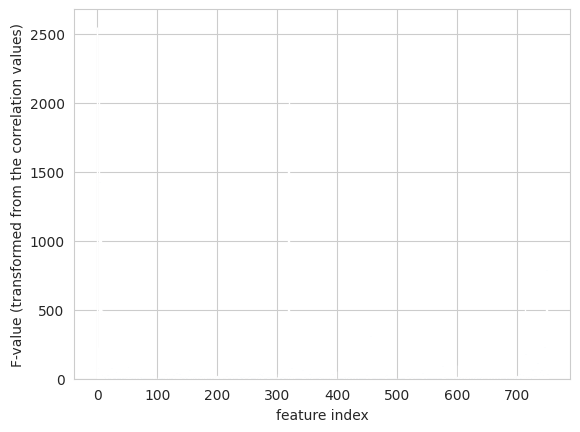

In [ ]:
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [ ]:
X_train.shape

(8495, 752)

In [ ]:
len(f_selector.scores_)

752

In [ ]:
data = {
  "Features": list(X_train.columns),
  "Score_cor_matrix": list(f_selector.scores_)
}

feature_frame = pd.DataFrame(data)
feature_frame.head()

,Features,Score_cor_matrix
0,Rooms,"2,553.393"
1,Distance,227.256
2,Postcode,78.281
3,Bedroom2,"2,341.129"
4,Bathroom,"1,425.502"


## Feature selection using the Mutual Information metric

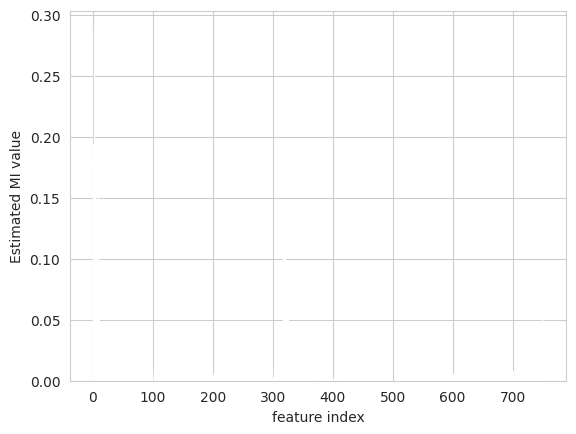

In [ ]:
# feature selection
f_selector = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("Estimated MI value")
plt.show()

In [ ]:
print(len(f_selector.scores_))
Score_mut_info_matrix = list(f_selector.scores_)

752


In [ ]:
feature_frame["Score_mut_info_matrix"] = Score_mut_info_matrix
feature_frame.head()

,Features,Score_cor_matrix,Score_mut_info_matrix
0,Rooms,"2,553.393",0.194
1,Distance,227.256,0.187
2,Postcode,78.281,0.288
3,Bedroom2,"2,341.129",0.179
4,Bathroom,"1,425.502",0.102


In [ ]:
feature_frame.describe()

,Score_cor_matrix,Score_mut_info_matrix
count,752.000,752.000
mean,29.698,0.006
std,182.028,0.021
min,0.000,0.000
25%,0.426,0.000
50%,2.098,0.001
75%,8.916,0.005
max,"2,553.393",0.288


In [ ]:
### We have two methods to selecte features one is correlation matrix and other is mututal information matrix here i am selecting correlation matix
### will select only those features which has score of greater then 40 for Score_cor_matrix


feature_frame_sort = feature_frame[feature_frame["Score_cor_matrix"] >= 40]

In [ ]:
feature_frame_sort.shape

(55, 3)

In [ ]:
feature_frame_sort

,Features,Score_cor_matrix,Score_mut_info_matrix
0,Rooms,"2,553.393",0.194
1,Distance,227.256,0.187
2,Postcode,78.281,0.288
3,Bedroom2,"2,341.129",0.179
4,Bathroom,"1,425.502",0.102
5,Car,365.633,0.088
6,Landsize,"1,033.366",0.140
7,Lattitude,466.849,0.142
8,Longtitude,495.163,0.141
10,Built_area_percent,195.549,0.057


In [ ]:
## we will train this models only on this 57 features out of 750 
## let's see what we get in results. 

In [ ]:
xyz = list(feature_frame_sort["Features"])

In [ ]:
X_train = X_train[xyz]
X_test = X_test[xyz]

# **LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_train, y_train)

0.7051969613491911

In [ ]:
y_predict_train = model.predict(X_train)

In [ ]:
y_train[:10].ravel()

array([1408000.000, 1300000.000, 805000.000, 704500.000, 910000.000,
       925000.000, 1800000.000, 678000.000, 646000.000, 1270000.000])

In [ ]:
y_predict_train[:10]

array([1108439.594, 1201470.285, 1227651.850, 927044.305, 798569.136,
       962575.579, 1206296.924, 747750.784, 664519.633, 1278081.660])

In [ ]:
y_train_list =y_train.tolist()
y_pred_list =y_predict_train.tolist()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.simplefilter("ignore")
import scipy.integrate as integrate
import scipy

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_train_list, y_pred_list)

In [ ]:
r_value

0.839760061773118

In [ ]:

## Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
#display adjusted R-squared
cal = (1 - r_value)*((len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
adj_r_square = 1 - cal
adj_r_square

0.8387157204290632

In [ ]:
p_value

0.0

In [ ]:
y_predict_test = model.predict(X_test)

In [ ]:
y_predict_test = model.predict(X_test)

In [ ]:
y_test_list =y_test.tolist()
y_predict_test =y_predict_test.tolist()

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_test_list, y_predict_test)

In [ ]:
r_value

0.8351969363149175

In [ ]:
## Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
#display adjusted R-squared
cal = (1 - r_value)*((len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
adj_r_square = 1 - cal
adj_r_square

0.8326692819639193

In [ ]:
p_value

0.0

## K-Nearest Neighbour

In [ ]:
### Scaling the data before model fitting

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_knn = scaler.transform(X_train)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_test)
x_test_knn = scaler.transform(X_test)

In [ ]:
x_train_knn

array([[0.114, 0.679, 0.074, ..., -0.647, -0.682, -0.549],
       [-0.971, -1.530, -0.422, ..., 1.546, -0.682, -0.549],
       [0.114, -0.278, -0.343, ..., 1.546, -0.682, -0.549],
       ...,
       [0.114, -0.208, 0.491, ..., -0.647, 1.467, -0.549],
       [0.114, -0.608, -0.715, ..., -0.647, -0.682, 1.821],
       [0.114, 0.540, -0.929, ..., -0.647, -0.682, 1.821]])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(8)
KNN.fit(x_train_knn , y_train )

KNeighborsRegressor(n_neighbors=8)

In [ ]:
y_predict_train = KNN.predict(x_train_knn)

In [ ]:
y_train[:10].ravel()

array([1408000.000, 1300000.000, 805000.000, 704500.000, 910000.000,
       925000.000, 1800000.000, 678000.000, 646000.000, 1270000.000])

In [ ]:
y_predict_train[:10]

array([1134500.000, 1206375.000, 1358125.000, 671875.000, 879750.000,
       1103937.500, 1308500.000, 892500.000, 616312.500, 1477994.625])

In [ ]:
y_train_list =y_train.tolist()
y_pred_list =y_predict_train.tolist()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.simplefilter("ignore")
import scipy.integrate as integrate
import scipy

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_train_list, y_pred_list)

In [ ]:
r_value

0.8709436344002661

In [ ]:
## Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
#display adjusted R-squared
cal = (1 - r_value)*((len(y_train)-1)/(len(y_train)-x_train_knn.shape[1]-1))
adj_r_square = 1 - cal
adj_r_square

0.8701025276212656

In [ ]:
p_value

0.0

In [ ]:
y_predict_test = KNN.predict(x_test_knn)

In [ ]:
y_test_list =y_test.tolist()
y_predict_test =y_predict_test.tolist()

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_test_list, y_predict_test)

In [ ]:
r_value

0.8130818906020706

In [ ]:
## Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
#display adjusted R-squared
cal = (1 - r_value)*((len(y_test)-1)/(len(y_test)-x_test_knn.shape[1]-1))
adj_r_square = 1 - cal
adj_r_square

0.8102150484333908

In [ ]:
p_value

0.0

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

## https://www.geeksforgeeks.org/random-forest-regression-in-python/
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [ ]:
y_predict_train = regressor.predict(X_train)

In [ ]:
y_predict_train

array([1413400.000, 1254710.000, 894680.000, ..., 1589415.000,
       1209590.000, 576215.000])

In [ ]:
y_train[:10].ravel()

array([1408000.000, 1300000.000, 805000.000, 704500.000, 910000.000,
       925000.000, 1800000.000, 678000.000, 646000.000, 1270000.000])

In [ ]:
y_predict_train[:10]

array([1413400.000, 1254710.000, 894680.000, 698780.000, 863335.000,
       995525.000, 1712888.880, 657435.000, 642910.000, 1257005.000])

In [ ]:
y_train_list =y_train.tolist()
y_pred_list =y_predict_train.tolist()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.simplefilter("ignore")
import scipy.integrate as integrate
import scipy

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_train_list, y_pred_list)

In [ ]:
r_value

0.9882219835115881

In [ ]:

## Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
#display adjusted R-squared
cal = (1 - r_value)*((len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
adj_r_square = 1 - cal
adj_r_square

0.9881452219394986

In [ ]:
p_value

0.0

In [ ]:
y_predict_test = regressor.predict(X_test)

In [ ]:
y_test_list =y_test.tolist()
y_predict_test =y_predict_test.tolist()

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_test_list, y_predict_test)

In [ ]:
r_value

0.9058535787089685

In [ ]:
## Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
#display adjusted R-squared
cal = (1 - r_value)*((len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
adj_r_square = 1 - cal
adj_r_square

0.904409615192235

In [ ]:
p_value

0.0

In [ ]:
X_test["Actual"] = y_test_list
X_test["pred"] = y_predict_test

In [ ]:
X_test.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Built_area_percent,Suburb_Albert Park,Suburb_Ashburton,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Brighton,Suburb_Brighton East,Suburb_Camberwell,Suburb_Glen Iris,Suburb_Glenroy,Suburb_Hampton,Suburb_Kew East,Suburb_Reservoir,Suburb_Sunshine West,Suburb_Surrey Hills,Type_h,Type_u,Method_SP,SellerG_Barry,SellerG_Buxton,SellerG_Fletchers,SellerG_Jellis,SellerG_Marshall,SellerG_Stockdale,SellerG_YPA,YearBuilt_1900,YearBuilt_1910,YearBuilt_1920,YearBuilt_1925,YearBuilt_1930,YearBuilt_1960,YearBuilt_1970,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Hume,CouncilArea_Manningham,CouncilArea_Maribyrnong,CouncilArea_Melton,CouncilArea_Moreland,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,Regionname_Northern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Actual,pred
1830,1,9.300,"3,162.000",1.000,1.000,1.000,0.000,-37.896,145.013,1.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"275,500.000","320,705.000"
13208,4,7.800,"3,079.000",4.000,2.000,2.000,585.000,-37.771,145.057,0.493,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"2,040,000.000","1,535,880.000"
2326,2,7.700,"3,184.000",2.000,1.000,1.000,0.000,-37.889,144.990,1.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"582,500.000","576,725.100"
4188,2,14.600,"3,189.000",2.000,1.000,2.000,756.000,-37.940,145.045,0.128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"1,191,000.000","1,176,090.000"
4644,3,9.900,"3,044.000",3.000,1.000,2.000,590.000,-37.717,144.951,0.493,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,"683,500.000","743,130.000"


In [ ]:
X_test.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Built_area_percent', 'Suburb_Albert Park', 'Suburb_Ashburton', 'Suburb_Balwyn', 'Suburb_Balwyn North', 'Suburb_Brighton', 'Suburb_Brighton East', 'Suburb_Camberwell', 'Suburb_Glen Iris', 'Suburb_Glenroy', 'Suburb_Hampton', 'Suburb_Kew East', 'Suburb_Reservoir', 'Suburb_Sunshine West', 'Suburb_Surrey Hills', 'Type_h', 'Type_u', 'Method_SP', 'SellerG_Barry', 'SellerG_Buxton', 'SellerG_Fletchers', 'SellerG_Jellis', 'SellerG_Marshall', 'SellerG_Stockdale', 'SellerG_YPA', 'YearBuilt_1900', 'YearBuilt_1910', 'YearBuilt_1920', 'YearBuilt_1925', 'YearBuilt_1930', 'YearBuilt_1960', 'YearBuilt_1970', 'CouncilArea_Bayside', 'CouncilArea_Boroondara', 'CouncilArea_Brimbank', 'CouncilArea_Hume', 'CouncilArea_Manningham', 'CouncilArea_Maribyrnong', 'CouncilArea_Melton', 'CouncilArea_Moreland', 'CouncilArea_Whitehorse', 'CouncilArea_Whittlesea', 'CouncilArea_Wyndham',
       'Regionname_North

In [ ]:
sort = X_test[['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Built_area_percent',"Actual","pred"]]

In [ ]:
sort.sample(20)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Built_area_percent,Actual,pred
469,3,10.500,"3,034.000",3.000,1.000,2.000,588.000,-37.771,144.859,0.493,"695,000.000","725,285.000"
2140,5,13.900,"3,108.000",5.000,3.000,2.000,656.000,-37.775,145.132,0.488,"1,400,000.000","1,518,351.000"
7355,2,7.400,"3,185.000",2.000,1.000,1.000,0.000,-37.879,144.997,1.000,"520,000.000","580,535.000"
2155,3,13.900,"3,108.000",3.000,1.000,2.000,657.000,-37.781,145.119,0.493,"1,180,000.000","1,294,321.000"
4912,3,8.800,"3,072.000",3.000,1.000,1.000,537.000,-37.737,145.023,0.493,"843,000.000","804,061.000"
2490,3,5.800,"3,078.000",2.000,1.000,2.000,530.000,-37.779,145.020,0.493,"1,125,000.000","1,514,235.000"
880,3,13.900,"3,165.000",3.000,1.000,3.000,780.000,-37.935,145.051,0.179,"900,000.000","1,280,185.000"
2803,2,9.200,"3,146.000",2.000,1.000,1.000,0.000,-37.857,145.045,0.493,"680,000.000","525,185.000"
5824,2,6.100,"3,182.000",2.000,1.000,0.000,0.000,-37.862,144.980,1.000,"580,000.000","587,814.000"
2717,2,6.400,"3,011.000",2.000,1.000,1.000,132.000,-37.795,144.890,0.629,"661,000.000","781,676.667"
